## Learning Outcomes
1. Gentle intro on CV
2. Recap on images as Numpy array
3. Image cropping
4. Splitting and merging of color channels
5. Point operators
- elementary operations : addition, subtraction, multiplication and division
- gamma correction(nonlinear technique)
6. Image blending (add 2 images together)

In [1]:
import sys
assert sys.version_info >=(3,7)

import cv2 as cv
import numpy as np
from util_func import show_img

## Recap on images as Numpy Array
There are 2 primary types of image : **grayscale** and **color**.


| Grayscale | Color | 
| --------------- | --------------- |
| Matrix (2D array)   | 3D array    | 
| (h, w)   | (h, w, character)    | 


In [2]:
#Create a grayscale image
img = np.zeros((2,4), dtype = np.uint8)
print(img)

[[0 0 0 0]
 [0 0 0 0]]


In [3]:
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_color)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [4]:
img[0, 1] = 50
img[1,2] = 150

print(img)

[[  0  50   0   0]
 [  0   0 150   0]]


In [5]:
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_color)

[[[  0   0   0]
  [ 50  50  50]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [150 150 150]
  [  0   0   0]]]


### Access elements in array

In [6]:
img = cv.imread("images/lena.jfif")

a = img[49, 219, 2]
b = img.item(49, 219, 2)

a == b

True

In [7]:
%timeit a = img[49, 219, 2]
%timeit b = img.item(49, 219, 2)

63 ns ± 0.17 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
60.3 ns ± 2.58 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


### Numpy slicing

In [8]:
h, w = img.shape[:2]
yc, xc = h // 2, w//2

topleft = img[:yc, :xc]

show_img("topleft", topleft)

In [9]:
# 60x60 central region of the image
centre = img[yc-30:yc+30, xc-30:xc+30]

show_img("centre", centre)

### Create a white image

In [10]:
img = np.zeros((200,200)) + 255
img = np.uint8(img)

show_img("img", img)

### Exercise

In [11]:
## Extract region of interest
img = cv.imread("images/flower.jfif")

show_img("img", img)

#### There are these ways to get the indices needed.

In [12]:
[i for i in dir(cv) if i.startswith("EVENT")]

['EVENT_FLAG_ALTKEY',
 'EVENT_FLAG_CTRLKEY',
 'EVENT_FLAG_LBUTTON',
 'EVENT_FLAG_MBUTTON',
 'EVENT_FLAG_RBUTTON',
 'EVENT_FLAG_SHIFTKEY',
 'EVENT_LBUTTONDBLCLK',
 'EVENT_LBUTTONDOWN',
 'EVENT_LBUTTONUP',
 'EVENT_MBUTTONDBLCLK',
 'EVENT_MBUTTONDOWN',
 'EVENT_MBUTTONUP',
 'EVENT_MOUSEHWHEEL',
 'EVENT_MOUSEMOVE',
 'EVENT_MOUSEWHEEL',
 'EVENT_RBUTTONDBLCLK',
 'EVENT_RBUTTONDOWN',
 'EVENT_RBUTTONUP']

In [13]:
# 1 way

img = cv.imread("images/flower.jfif")
img_copy = img.copy()
def rect_region(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN :
        print ((x, y))
        cv.circle(img, (x, y), 1, (0,0,255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", rect_region)
cv.waitKey(0)
cv.destroyAllWindows()

In [14]:
flower = img_copy[41:120, 89:175]

show_img("flower", flower)

In [15]:
#2nd way
bbox = cv.selectROI("crop", img_copy)

flower_1 = img_copy[int(bbox[1]):int(bbox[1] + bbox[3]), 
                 int(bbox[0]):int(bbox[0] + bbox[2])]

show_img("flower", flower_1)
cv.waitKey(0)
cv.destroyAllWindows()

In [16]:
img_arr = np.zeros((30, 30), dtype = np.uint8)

img_arr[:10, 10:20] = 255 # top left first 10 & 10-19 (top)
img_arr[10:20, :10] = 255 # top right 10-19 & 0-9 (left)
img_arr[10:20, 20:] = 255 # bottom left 10 -19 & 20 onwards (right)
img_arr[20:, 10:20] = 255 # bottom right 20 onwards & 10 -19 (bottom)

img = np.tile(img_arr, (3,3))

show_img("pattern", img)


## Image cropping
Why?
- Remove unwanted object/ areas from an image
- Separate the image into a $3\times 35$ grids, We move / adjust the camera in such a way that the object of the interest list on the gridlines or their intersections. As such, your image would look authentically appealing. This is known as rule of thirds.
- One of the image augmentation methods for DL model training.

In [17]:
img = cv.imread("images/dog.jfif")
img_copy = img.copy()

h, w = img.shape[:2]
#user defined parameters
n_vertical_grids = 4
n_horizontal_grids = 4

tiles =[]
M = int(h/ n_vertical_grids)
N = int(w / n_horizontal_grids)

for y in range(0, h, M):
    for x in range(0, w, N):
        x1 = x + N
        y1 = y + M
        
        if x1 > w and y1 > h:
            x1 = w - 1
            y1 = h - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:h, x:w]
            tiles.append(tile)
            
        elif y1 > h:
            y1 = h - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:h, x:x1]
            tiles.append(tile)
            
        elif x1 > w:
            y1 = h - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:y1, x:w]
            tiles.append(tile)
            
        else:
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:y1, x:x1]
            tiles.append(tile)

show_img("crop", img_copy)

In [18]:
show_img("patch", tiles[9])

## Splitting and merging color channels

In [19]:
img = cv.imread("images/lena.jfif")

(b, g, r) = cv.split(img)
img_merge = cv.merge((b,g,r))
np.array_equal(img, img_merge)

True

In [20]:
import matplotlib.pyplot as plt

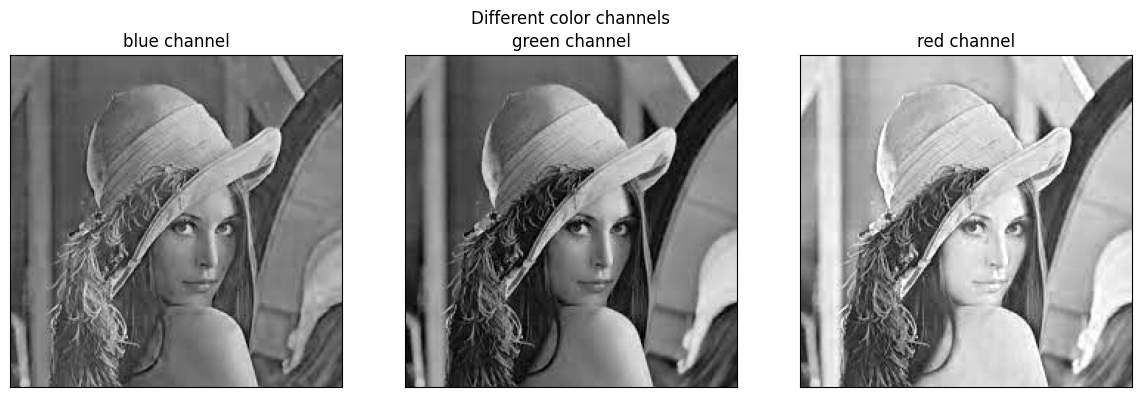

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 4), sharey= True)
fig.suptitle("Different color channels")

ax1.imshow(b, cmap = plt.cm.gray)
ax1.set(title = "blue channel", xticks=[], yticks=[])

ax2.imshow(g, cmap = plt.cm.gray)
ax2.set(title = "green channel", xticks=[], yticks=[])

ax3.imshow(r, cmap = plt.cm.gray)
ax3.set(title = "red channel", xticks=[], yticks=[])

plt.tight_layout()
plt.show()

## Display different channels in color images

In [22]:
img = cv.imread("images/dog.jfif")
channels = cv.split(img)

# This color variable will be window names
colors = ("blue", "green", "red")

imgs = []

for i, ch in enumerate(channels):
    img_arr = np.zeros_like(img)
    img_arr[..., i] = ch
    imgs.append(img_arr)
    
for c, img in zip(colors, imgs):
    cv.imshow(c, img)
    
cv.waitKey(0)
cv.destroyAllWindows()

## Point operators
Elementary math operations: addition, subtraction, multiplication and division
$$f_{trans}(\textbf{x}) = \alpha f(\textbf{x}) + \beta$$

In [23]:
np.uint8(np.array([-2, 0, 255, 300]))

array([254,   0, 255,  44], dtype=uint8)

In [24]:
def point_op(img, alpha, beta):
    """points operators of image, Arguments:
    1. source image
    2. multiplier
    3. constant
    """
    img = img.astype(float)
    res  = alpha * img + beta
    res = np.clip(res, 0, 255)
    return np.uint8(res)

In [25]:
img = cv.imread("images/bridge.jfif")

#inrease the brightness and contrast
transform = point_op(img, 1.6, 20)

cv.imshow("original", img)
show_img("transform", transform)

In [26]:
darken = point_op(img, 1, -80)

show_img("img", darken)

## Gamma correction
Technique to adjust brightness of image.
$$0 = (\frac{I}{255})^{\gamma}\times{255}$$

In [27]:
gamma = 1 / 2.2

lookUpTable = np.empty((1, 256), dtype = np.uint8)

for i in range(256):
    lookUpTable[0, 1] = np.clip(pow(1/255.0, gamma) * 255.0,0,255)
    
img = cv.imread("images/mountains_prop.jpg")
res = cv.LUT(img, lookUpTable)

cv.namedWindow("original", cv.WINDOW_NORMAL)
cv.imshow("original", img)
show_img("gamma correction", res, adjust=True)

## Image blending (add 2 images）
```
cv.addWeighted(img1, alpha, img2, 1-alpha, beta)
```

$$h(\textbf{x}) = \alpha f(\textbf{x}) + (1 - \alpha)g(\textbf{x}) + \beta$$



In [47]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

# resize img2 to be the same dimension as img
h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))
alpha = 0.7
res = cv.addWeighted(img, alpha, img2, 1-alpha, 0)

#cv.addWeighted(img, alpha, img2, i-alpha, 0, res)

cv.imshow("lena", img)
cv.imshow("resized coin", img2)
show_img("image blending", res)

## Weekly activity

### Exercise 1
Create a **random noise color and grayscale** image. You can set your own width and height, but keep the total number of pixels of both images identical.

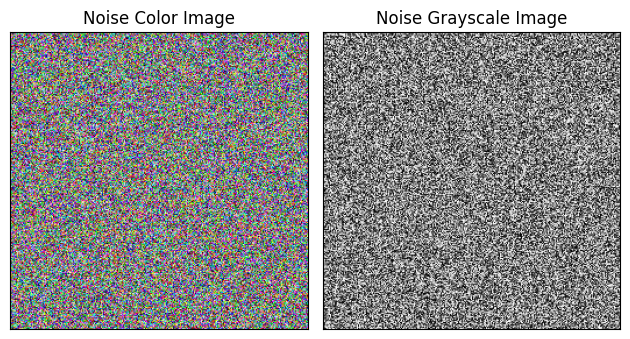

In [29]:
# Set the width and the height
w = 256
h = 256

# Create a random noise color and grayscale image
noise_color_img = np.random.randint(0, high = 256, size = (h, w, 3), dtype = np.uint8)
noise_grayscale_img = np.random.randint(0, high = 256, size = (h, w), dtype=np.uint8)

#show image
plt.subplot(1, 2, 1)
plt.imshow(noise_color_img)
plt.title("Noise Color Image")
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(noise_grayscale_img, cmap ='gray')
plt.title("Noise Grayscale Image")
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


### Exercise 2
Convert the code chunk found under section. Divide an image into smaller patches using cropping into a function with the following signature:

```
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
# img is the source image
# number_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
# line _color is the color of the grid line.
# The output of the function should be image with grids.
```

In [43]:
# Function to draw crop grid on the image
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    
    # Calculate the dimensions of a patch
    h, w = img.shape[:2]
    patch_h = int(h / num_vertical_grid)
    patch_w = int(w / num_horizontal_grid)
    
    # Create a copy of the image to draw the grid lines on it
    img_copy = np.copy(img)
    
    # draw the horizontal grid lines
    for i in range(1, num_vertical_grid):
        y = i * patch_h
        img_copy[y, :] = line_color
        
    # draw vertical grid line
    for i in range(1, num_horizontal_grid):
        x = i * patch_w
        img_copy[:, x, :] = line_color
        
    return img_copy

# Function to crop a patch
def crop_patch(img, num_horizontal_grid, num_vertical_grid, patch_x, patch_y):
    
    # Calculate the dimensions of a patch
    h, w = img.shape[:2]
    patch_h = int(h / num_vertical_grid)
    patch_w = int(w / num_horizontal_grid)
    
    #Calculate the starting and ending coordinates of the patch based on the grid size
    x_start = patch_x * patch_w
    x_end = (patch_x + 1) * patch_w
    y_start = patch_y * patch_h
    y_end = (patch_y + 1) * patch_h
    
    return img[y_start: y_end, x_start:x_end]

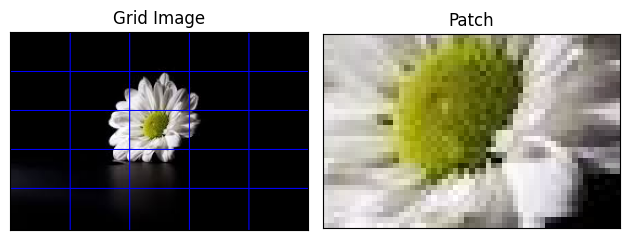

In [44]:
img = plt.imread("images/flower.jfif")
num_horizontal_grid = 5
num_vertical_grid = 5
line_color = [0, 0, 255] #blue color for the grid line

# Display the image with grids in notebook
grid_line_img = crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
plt.subplot(1,2,1)
plt.imshow(grid_line_img)
plt.title("Grid Image")
plt.xticks([]), plt.yticks([])

#Crop a patch and display the patch
patch_x = 2
patch_y = 2
patch = crop_patch(img, num_horizontal_grid, num_vertical_grid, patch_x, patch_y)
plt.subplot(1, 2, 2)
plt.imshow(patch)
plt.title("Patch")
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

### Exercise 3
Display image sequences of smooth transition of two images with different values of $\alpha$.
Refer to code in section "Image blending". Use *"lena.jfif"* and *"coins.jfif"* as the base images.

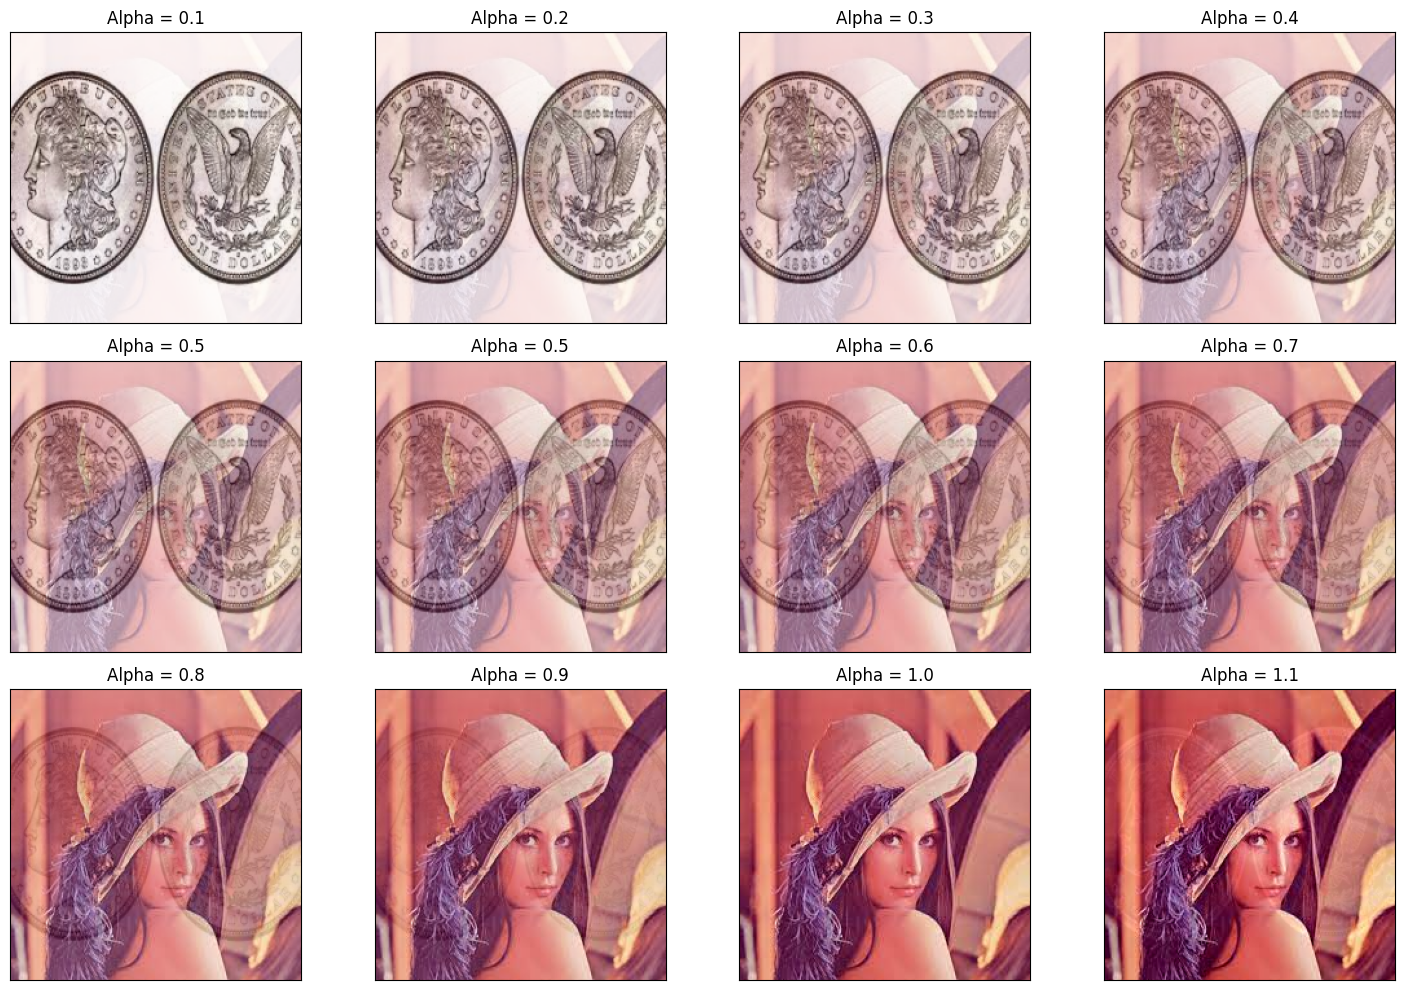

In [69]:
img1 = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

# resize img2 to be the same dimension as img
h, w = img1.shape[:2]
img2 = cv.resize(img2, (w, h))

#set the number of the frames in the transition
num_frames = 11

# Create and display the image sequance with smooth transition
plt.figure(figsize=(15, 10))

for i in range(num_frames + 1):
    alpha = (i+1) / num_frames # vary alpha from 0 to 1
    blended_img = cv.addWeighted(img, alpha, img2, 1-alpha, 0)
    
    plt.subplot(3, 4, i+1)
    plt.imshow(cv.cvtColor(blended_img, cv.COLOR_BGR2RGB)) # convert from BGR to RGB
    plt.title(f"Alpha = {alpha:.1f}")
    plt.xticks([]), plt.yticks([])
    
plt.tight_layout()
plt.show()

### Exercise 4
Suppose you are a digital content creator and wish to share photo online. However, you wish to protect these images from being stolen or altered by others. Levarage your image processing knowledge to apply watermark on image *travel_hd.jpg*. The example of resulting watermarked image are as shown in the following:

Notice the watermark added to the bottom left of the image. You are free to design your own watermark icon.

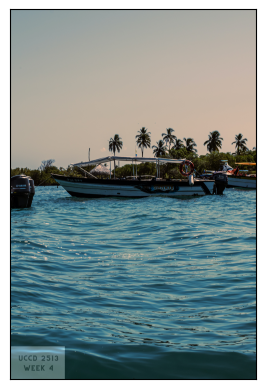

In [76]:
img = cv.imread("images/travel_hd.jpg")
watermark = cv.imread("images/watermark.jpg", cv.IMREAD_UNCHANGED)

# resize the watermark to fit the image size
#scale = 0.2
#watermark = cv.resize(watermark, (0,0), fx = scale, fy = scale)

# Get the dimension of the watermark image
wm_h, wm_w = watermark.shape[:2]

# Get the dimension of the image 
img_h, img_w = img.shape[:2]

#calculate roi from bottom and left
bottom_y = img_h
left_x = 0

#calculate the top and right coordinates based on the watermark size
top_y = bottom_y - wm_h
right_x = left_x + wm_w

# add watermark to the image
roi = img[top_y:bottom_y, left_x: right_x]
result = cv.addWeighted(roi, 1, watermark, 0.3, 0)
img[top_y:bottom_y, left_x:right_x] = result

#Convert BGR image to RGB for matplotlib display
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#display watermarked image
plt.imshow(img_rgb)
plt.xticks([]), plt.yticks([])
plt.show()
